**Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

**Reading & Previewing dataset**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/flights.csv", low_memory=False)

**Shape of dataset**

In [4]:
df.shape

(5819079, 31)

**Subsetting only 100000 rows for analysis**

In [5]:
df1 = df.head(n = 100000)

**Info of datasset**

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

In [7]:
df1.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


**Unique counts of 'DIVERTED' columns, wheather 0 indicate Not Diverted and 1 is Diverted**

In [8]:
df1.value_counts("DIVERTED")

DIVERTED
0    99776
1      224
dtype: int64

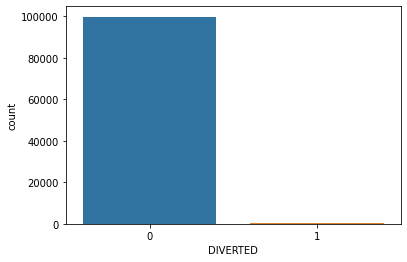

In [9]:
sns.countplot(x='DIVERTED', data=df1)

**Identifying Null values in dataset**

In [10]:
#Using count will output the number of non-missing values for each column in the dataset..Thus, telling us how many values are actually missing in each column 
df1.count()

#List of columns having missing values 
list_nacols = df1.columns[df1.isna().any()].tolist()
list_nacols

#For each column in the above list, printing their values too..
val_nacols = df1.loc[:, list_nacols]

In [11]:
df1.mean()

YEAR                   2015.000000
MONTH                     1.000000
DAY                       3.733920
DAY_OF_WEEK               4.107310
FLIGHT_NUMBER          2240.827980
SCHEDULED_DEPARTURE    1306.348280
DEPARTURE_TIME         1326.265614
DEPARTURE_DELAY          19.937749
TAXI_OUT                 17.155917
WHEELS_OFF             1348.426154
SCHEDULED_TIME          143.039340
ELAPSED_TIME            142.362995
AIR_TIME                117.098032
DISTANCE                830.389430
WHEELS_ON              1454.528690
TAXI_IN                   8.117876
SCHEDULED_ARRIVAL      1481.115620
ARRIVAL_TIME           1458.029920
ARRIVAL_DELAY            18.342304
DIVERTED                  0.002240
CANCELLED                 0.023890
AIR_SYSTEM_DELAY         14.026801
SECURITY_DELAY            0.070787
AIRLINE_DELAY            17.853921
LATE_AIRCRAFT_DELAY      26.014556
WEATHER_DELAY             2.751971
dtype: float64

**Replacing Null values with mean**

In [12]:
df1.fillna(df1.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [13]:
#Rearranging the columns of flights1 dataframe
df1 = df1[['MONTH','DAY','DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY']]

**Droping unwwanted columns (i.e not highly co-related)**

In [14]:
df2 = df1[['MONTH','DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'ARRIVAL_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [15]:
df2.shape

(100000, 12)

**Correlation**

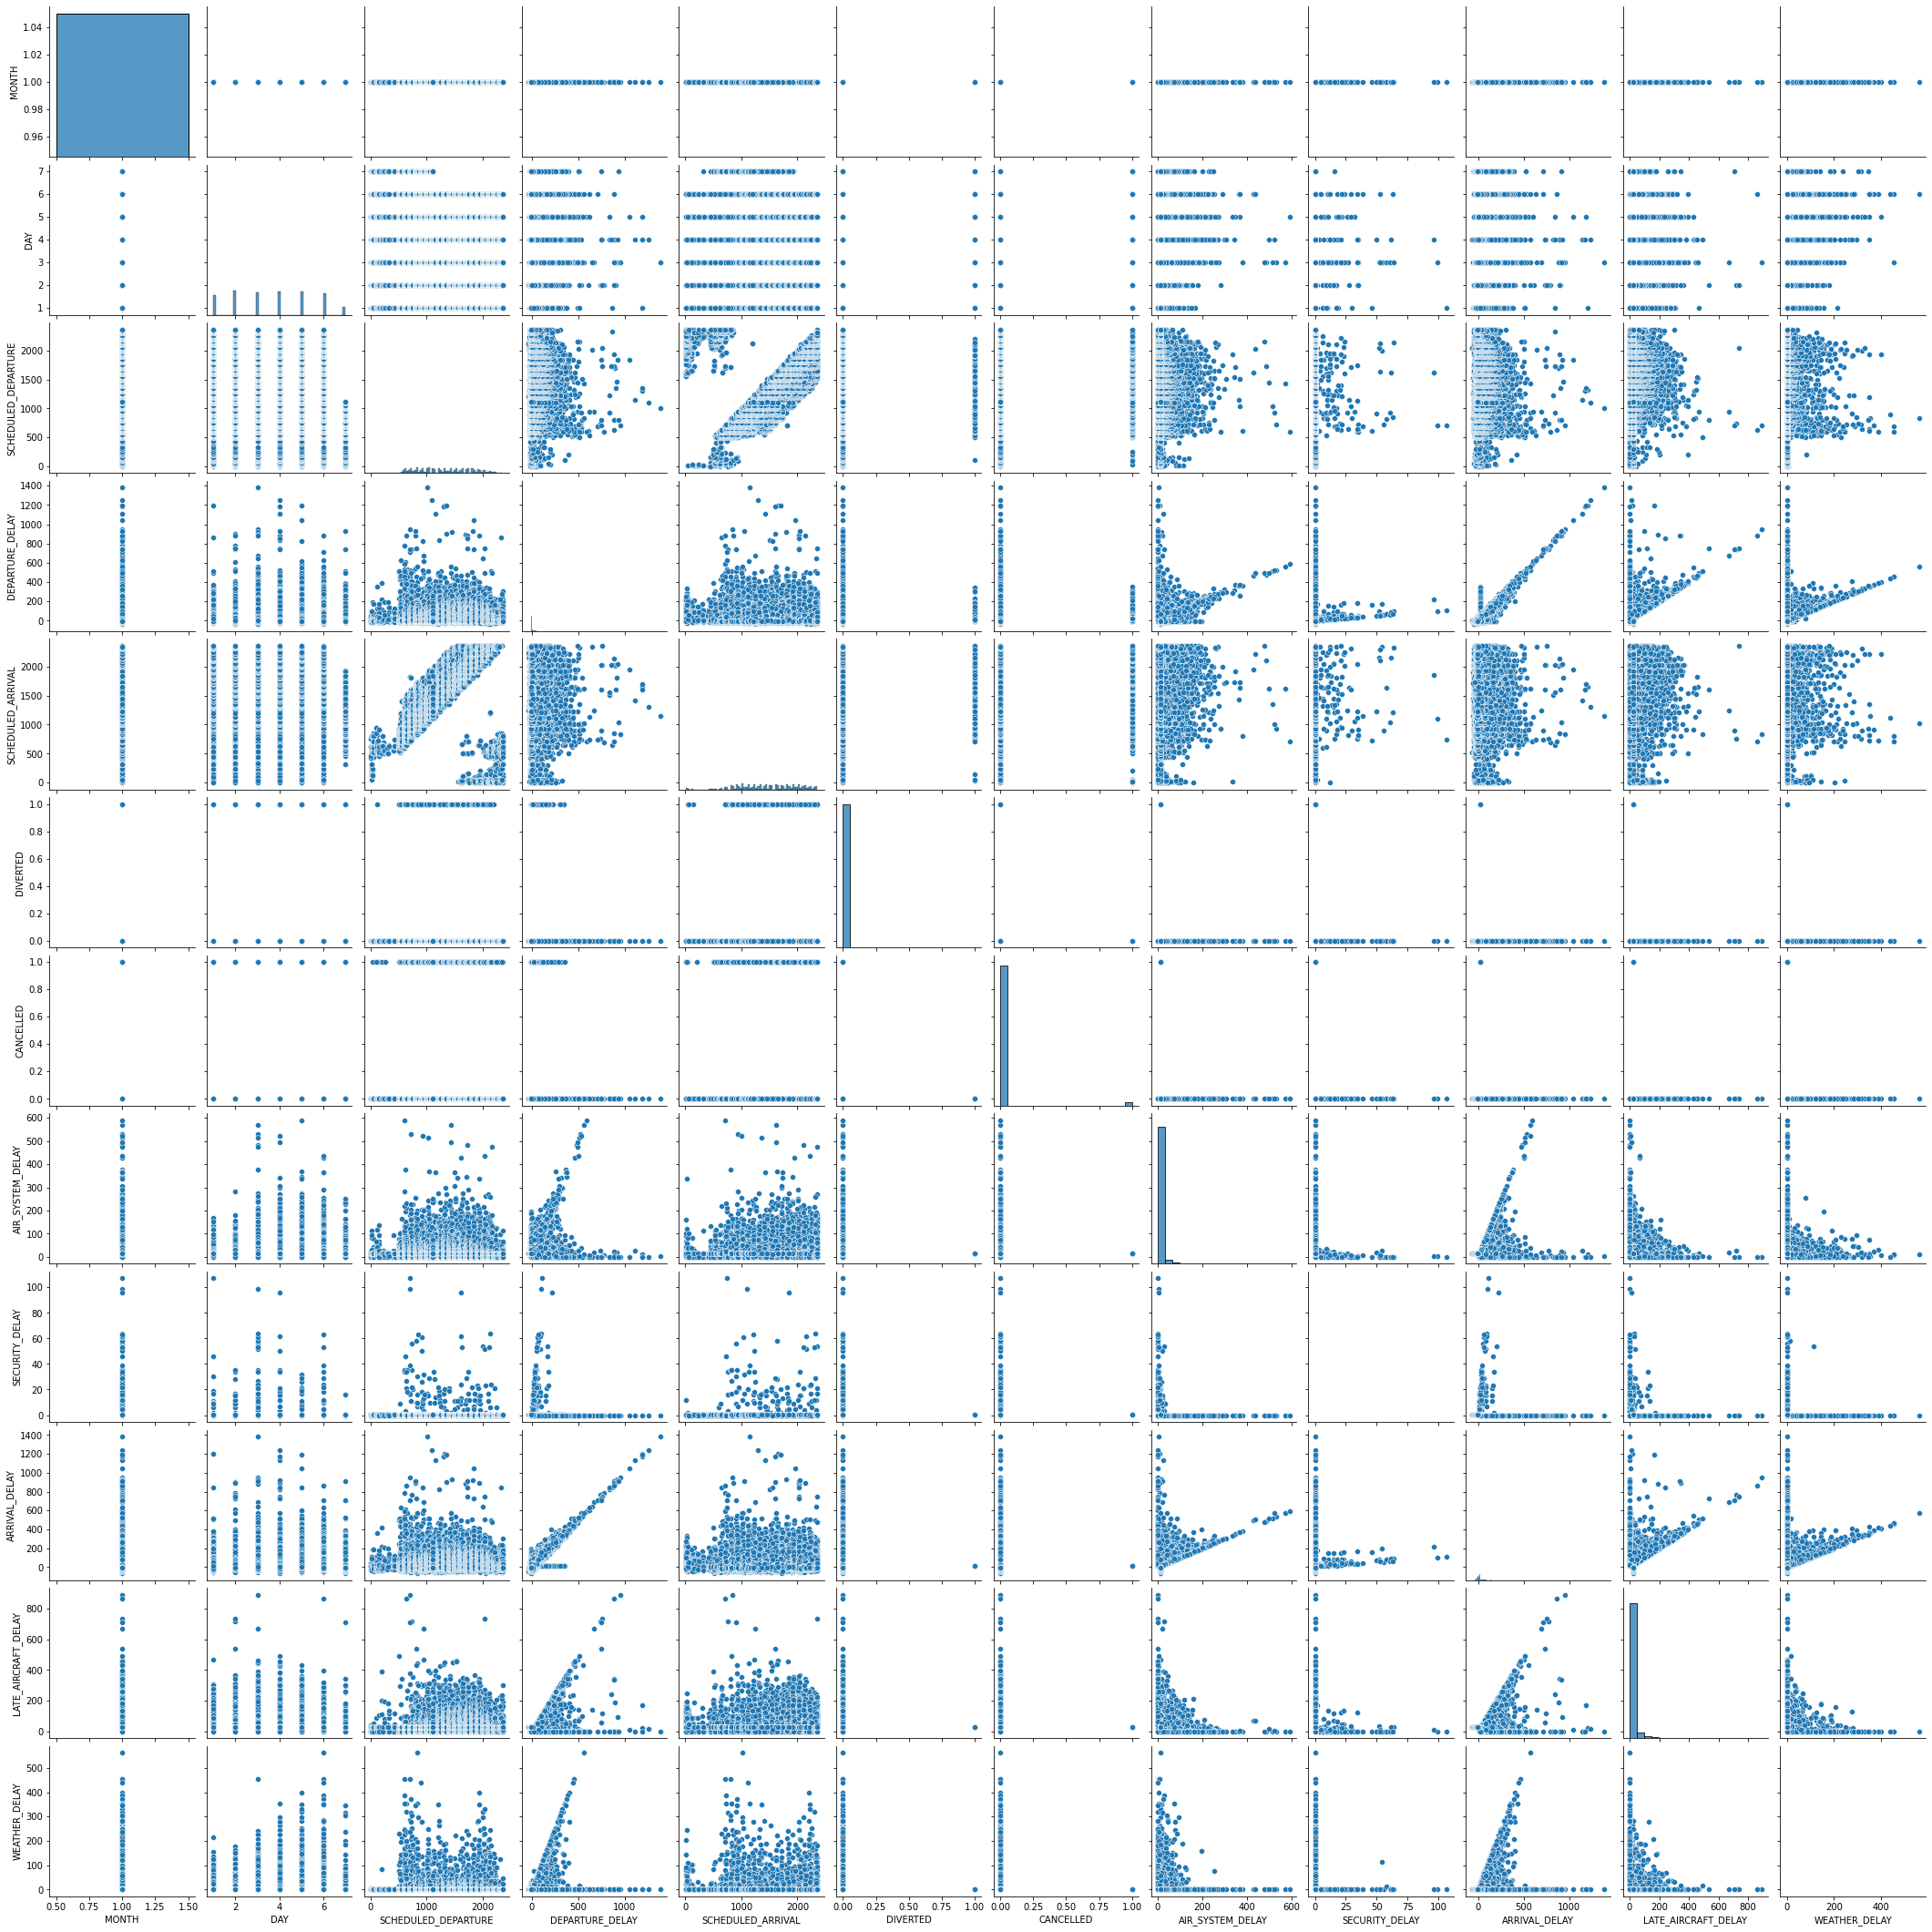

In [16]:
sns.pairplot(df2)


Here we notice that there are no dependent variable yet which serves as our result wheather flight is delayed or not.

So here I'm creating new feature called 'result' which takes the value 0 and 1. O for the resulting flight is not delayed and 1 for flight delayed.

Here I'm Imputing these values by using the condition if 'ARRIVAL_DELAY' is greater than 15 then imputing 1 else o

In [17]:
df2['result'] = np.where(df2['ARRIVAL_DELAY'] > 15, 1, 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df2.value_counts("result")

result
0    63779
1    36221
dtype: int64

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                100000 non-null  int64  
 1   DAY                  100000 non-null  int64  
 2   SCHEDULED_DEPARTURE  100000 non-null  int64  
 3   DEPARTURE_DELAY      100000 non-null  float64
 4   SCHEDULED_ARRIVAL    100000 non-null  int64  
 5   DIVERTED             100000 non-null  int64  
 6   CANCELLED            100000 non-null  int64  
 7   AIR_SYSTEM_DELAY     100000 non-null  float64
 8   SECURITY_DELAY       100000 non-null  float64
 9   ARRIVAL_DELAY        100000 non-null  float64
 10  LATE_AIRCRAFT_DELAY  100000 non-null  float64
 11  WEATHER_DELAY        100000 non-null  float64
 12  result               100000 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 9.9 MB


**Confuction Matrix using Heatmap**

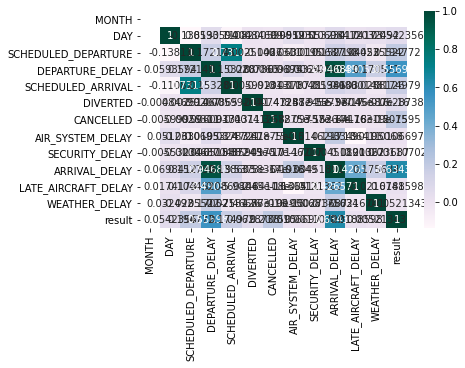

In [20]:
sns.heatmap(df2.corr(), annot=True, cmap="PuBuGn" ,fmt='g')

**Preview after adding new column 'result**

In [21]:
df2

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,ARRIVAL_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,5,-11.0,430,0,0,14.026801,0.070787,-22.0,26.014556,2.751971,0
1,1,1,10,-8.0,750,0,0,14.026801,0.070787,-9.0,26.014556,2.751971,0
2,1,1,20,-2.0,806,0,0,14.026801,0.070787,5.0,26.014556,2.751971,0
3,1,1,20,-5.0,805,0,0,14.026801,0.070787,-9.0,26.014556,2.751971,0
4,1,1,25,-1.0,320,0,0,14.026801,0.070787,-21.0,26.014556,2.751971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,1108,-6.0,1219,0,0,14.026801,0.070787,-11.0,26.014556,2.751971,0
99996,1,7,1108,9.0,1842,0,0,14.026801,0.070787,2.0,26.014556,2.751971,0
99997,1,7,1108,-7.0,1225,0,0,14.026801,0.070787,7.0,26.014556,2.751971,0
99998,1,7,1109,7.0,1454,0,0,14.026801,0.070787,-1.0,26.014556,2.751971,0


In [22]:
X = df2.iloc[:,:-1].values
y = df2.iloc[:,-1].values

**Splitting Dataset into Training and Testing with 70:30 ratio and with random_state = 42**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [24]:
print(X_train)

[[ 1.00000000e+00  5.00000000e+00  1.90500000e+03 ...  6.00000000e+01
   4.90000000e+01  0.00000000e+00]
 [ 1.00000000e+00  4.00000000e+00  1.94500000e+03 ... -3.00000000e+00
   2.60145560e+01  2.75197112e+00]
 [ 1.00000000e+00  2.00000000e+00  1.82200000e+03 ...  1.60000000e+01
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.00000000e+00  5.00000000e+00  1.92900000e+03 ... -1.70000000e+01
   2.60145560e+01  2.75197112e+00]
 [ 1.00000000e+00  1.00000000e+00  7.00000000e+02 ...  3.06000000e+02
   3.06000000e+02  0.00000000e+00]
 [ 1.00000000e+00  2.00000000e+00  7.05000000e+02 ... -3.00000000e+00
   2.60145560e+01  2.75197112e+00]]


In [25]:
print(y_train)

[1 0 1 ... 0 1 0]


In [26]:
print(X_test)

[[ 1.00000000e+00  5.00000000e+00  1.81500000e+03 ...  2.53000000e+02
   2.23000000e+02  0.00000000e+00]
 [ 1.00000000e+00  6.00000000e+00  6.35000000e+02 ... -1.00000000e+01
   2.60145560e+01  2.75197112e+00]
 [ 1.00000000e+00  2.00000000e+00  1.10300000e+03 ... -9.00000000e+00
   2.60145560e+01  2.75197112e+00]
 ...
 [ 1.00000000e+00  3.00000000e+00  2.13500000e+03 ... -4.00000000e+00
   2.60145560e+01  2.75197112e+00]
 [ 1.00000000e+00  5.00000000e+00  6.35000000e+02 ...  0.00000000e+00
   2.60145560e+01  2.75197112e+00]
 [ 1.00000000e+00  3.00000000e+00  8.54000000e+02 ...  1.83423044e+01
   2.60145560e+01  2.75197112e+00]]


In [27]:
print(y_test)

[1 0 0 ... 0 0 1]


In [28]:
X_test.shape

(30000, 12)

**Feature Scalling**

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
print(X_train)

[[ 0.00000000e+00  6.96272579e-01  1.24047415e+00 ...  8.63816882e-01
   9.04472471e-01 -2.70130898e-01]
 [ 0.00000000e+00  1.45797308e-01  1.32335243e+00 ... -4.42926890e-01
  -3.07341225e-03 -5.55452065e-04]
 [ 0.00000000e+00 -9.55153235e-01  1.06850172e+00 ... -4.88295621e-02
  -1.03021925e+00 -2.70130898e-01]
 ...
 [ 0.00000000e+00  6.96272579e-01  1.29020112e+00 ... -7.33314395e-01
  -3.07341225e-03 -5.55452065e-04]
 [ 0.00000000e+00 -1.50562851e+00 -1.25623399e+00 ...  5.96634018e+00
   1.10517331e+01 -2.70130898e-01]
 [ 0.00000000e+00 -9.55153235e-01 -1.24587420e+00 ... -4.42926890e-01
  -3.07341225e-03 -5.55452065e-04]]


**Model: DecisionTreeClassifier**

In [37]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
y_pred = clf.predict(X_test)

In [42]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


**Confusion Matrix and AUC score**

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[19140     0]
 [    0 10860]]


1.0

In [45]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred)
auc_score

1.0

Text(0.5, 257.44, 'Predicted label')

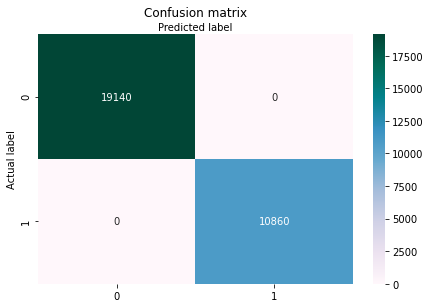

In [47]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="PuBuGn" ,fmt='g')## visualized confusion matrix using heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Receiver Operating Characteristic (ROC) curve of DecisionTreeClassifier**

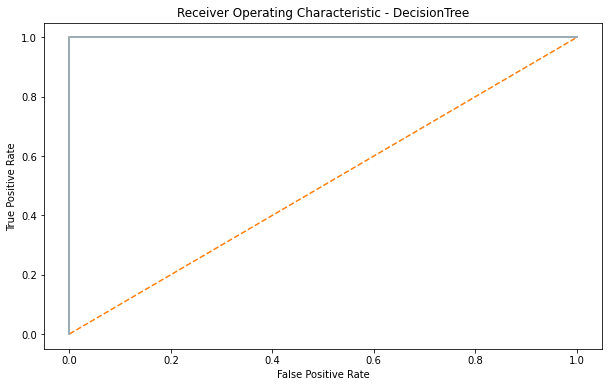

In [50]:
import matplotlib.pyplot as plt
from sklearn import metrics
plt.subplots(1, figsize=(10,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()